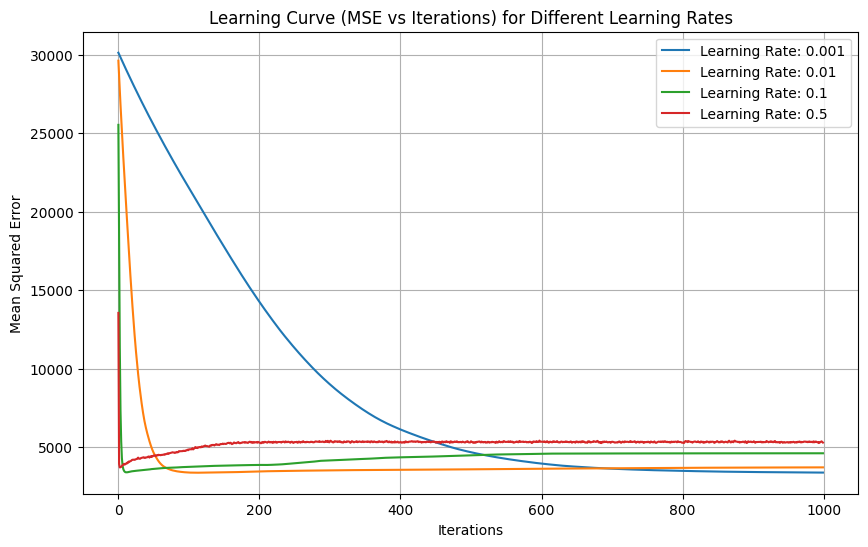

Learning Rate: 0.001, Test Set MSE: 3189.0141481146875, R-squared: 0.39808931501300227
Learning Rate: 0.01, Test Set MSE: 3204.3331628490764, R-squared: 0.39519792657010266
Learning Rate: 0.1, Test Set MSE: 3600.5529869129373, R-squared: 0.3204133898352316
Learning Rate: 0.5, Test Set MSE: 3590.314331678145, R-squared: 0.32234588549046816
Final weights (theta): [[ 147.59429439]
 [   5.86893925]
 [ -13.76703009]
 [  26.84977628]
 [   5.59599281]
 [ 227.9845114 ]
 [-178.2612058 ]
 [-125.49005557]
 [ -61.76956954]
 [ -27.64593842]
 [  -7.58414641]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Load and prepare the Diabetes Dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Step 2: Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term (column of 1s) to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Adding bias term to the feature set

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

# Reshape target to be a column vector
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Step 4: LMS Algorithm Implementation with Gradient Clipping
def lms_algorithm(X, y, learning_rate=0.01, n_iterations=1000, clip_value=1.0):
    m, n = X.shape  # m = number of training examples, n = number of features
    theta = np.random.randn(n, 1)  # Random initialization of weights (theta)
    errors = []

    for iteration in range(n_iterations):
        total_error = 0
        for i in range(m):
            xi = X[i:i+1]
            yi = y[i:i+1]
            prediction = xi.dot(theta)  # Prediction using current weights
            error = yi - prediction      # Error is the difference between predicted and actual values

            gradient = xi.T.dot(error)  # Compute gradient
            gradient = np.clip(gradient, -clip_value, clip_value)  # Clip the gradients
            theta += learning_rate * gradient  # Update rule for LMS with clipped gradient

            total_error += error ** 2    # Accumulate squared errors

        mse = total_error / m   # Mean Squared Error (MSE)
        errors.append(mse.item())  # Store MSE for each iteration

    return theta, errors

# Step 5: Train the model using LMS with different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5]
n_iterations = 1000

# Plot learning curves for different learning rates
plt.figure(figsize=(10, 6))

for lr in learning_rates:
    theta, errors = lms_algorithm(X_train, y_train, learning_rate=lr, n_iterations=n_iterations, clip_value=1.0)
    plt.plot(errors, label=f"Learning Rate: {lr}")

plt.title("Learning Curve (MSE vs Iterations) for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Evaluate the model on the test set for each learning rate
for lr in learning_rates:
    theta, _ = lms_algorithm(X_train, y_train, learning_rate=lr, n_iterations=n_iterations, clip_value=1.0)
    y_pred_test = X_test.dot(theta)

    # Mean Squared Error
    mse_test = np.mean((y_pred_test - y_test) ** 2)

    # R-squared (R2) Calculation
    y_test_mean = np.mean(y_test)
    ss_total = np.sum((y_test - y_test_mean) ** 2)
    ss_residual = np.sum((y_test - y_pred_test) ** 2)
    r_squared = 1 - (ss_residual / ss_total)

    print(f"Learning Rate: {lr}, Test Set MSE: {mse_test}, R-squared: {r_squared}")

# Final weights (theta) for the best learning rate
print("Final weights (theta):", theta)